<a href="https://colab.research.google.com/github/mdaugherity/Numerical-2021/blob/main/integrals/Week_6_Newton_Cotes_Integrals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 
from scipy.integrate import quad

# NUMERICAL INTEGRATION - Demo of Newton-Cotes Methods
Dr. Daugherity, PHYS 451 Spring 2021.  

Shows how to do numerical integration with the rectangle, trapezoid, and Simpson's composite methods.  

Here we do it from scratch.  You can get the same results with *np.trapz* and *scipy.integrate.simp*

Method	Integral		Error
Rect	19.229504033361955	0.6816262285227204
Trap	18.435563275982833	1.4755669859018425
Simp	14.0578153768131	5.853314885071576


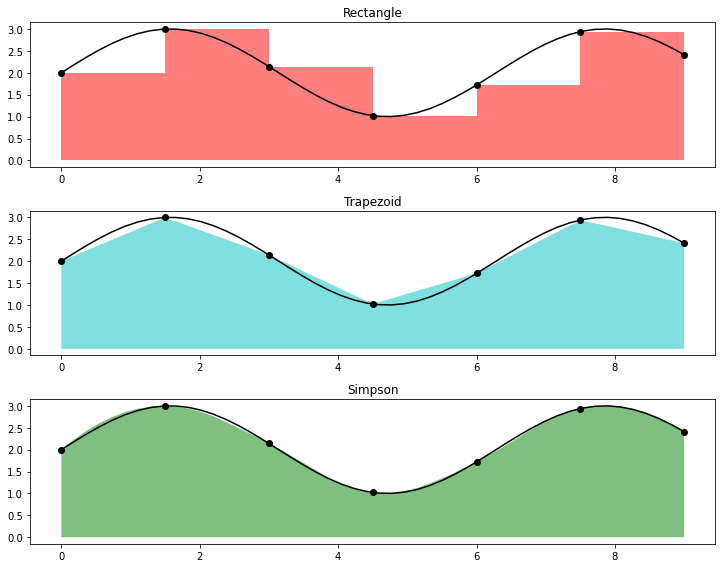

In [11]:
def f(x):   # function to integrate
  return np.sin(x)+2 

N = 7   # number of data points (must be odd!)
a = 0   # integration range from a to b
b = 9  

xdata = np.linspace(a,b,N)
h = xdata[1] - xdata[0]
ydata = f(xdata)

# Define weights so that I = dot(w,ydata)
w_rect = np.ones_like(ydata)*h
w_rect[-1] = 0

w_trap = np.ones_like(ydata)*h
w_trap[0] = 0.5
w_trap[-1] = 0.5

w_simp = np.ones_like(ydata)*h
for i in range(1,N-1,2):
  w_simp[i] = 4
for i in range(2,N-2,2):
  w_simp[i] = 2
w_simp /= 3

# Calculate Integrals
I_rect = np.dot(w_rect,ydata)
I_trap = np.dot(w_trap,ydata)
I_simp = np.dot(w_simp,ydata)

# Find error vs quad
sol,_ = quad(f,a,b)  # the accurate solution
print("Method\tIntegral\t\tError")
print(f"Rect\t{I_rect}\t{sol-I_rect}")
print(f"Trap\t{I_trap}\t{sol-I_trap}")
print(f"Simp\t{I_simp}\t{sol-I_simp}")

# PLOTS 
x = np.linspace(a,b)
y = f(x)
plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
plt.plot(x,y,'k-')
plt.plot(xdata,ydata,'ko')
for i in range(N-1):
  plt.fill_between((xdata[i],xdata[i+1]),ydata[i],fc='r',alpha=0.5)
plt.title('Rectangle')

plt.subplot(3,1,2)
plt.plot(x,y,'k-')
plt.plot(xdata,ydata,'ko')
trap_area = interp1d(xdata,ydata,kind='linear')
plt.fill_between(x,trap_area(x),fc='c',alpha=0.5)
plt.title('Trapezoid')

plt.subplot(3,1,3)
plt.plot(x,y,'k-')
plt.plot(xdata,ydata,'ko')
simp_area = interp1d(xdata,ydata,kind='quadratic')
plt.fill_between(x,simp_area(x),fc='g',alpha=0.5)
plt.title('Simpson')

plt.tight_layout()
plt.show()